<a href="https://colab.research.google.com/github/migueluf/API_node/blob/master/Analise_PIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das operações pix



In [ ]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
wb = Workbook
import requests
import pprint
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
link = 'https://olinda.bcb.gov.br/olinda/servico/SPI/versao/v1/odata/PixLiquidadosAtual?$top=100000&$format=json&$select=Data,Quantidade,Total,Media'
requisicao = requests.get(link)
info = requisicao.json()
pprint.pprint(info)

{'@odata.context': 'https://was-p.bcnet.bcb.gov.br/olinda/servico/SPI/versao/v1/odata$metadata#PixLiquidadosAtual(Data,Quantidade,Total,Media)',
 'value': [{'Data': '2021-06-04',
            'Media': 690.68,
            'Quantidade': 24945880,
            'Total': 17229599.27},
           {'Data': '2021-09-28',
            'Media': 622.88,
            'Quantidade': 28840568,
            'Total': 17964083.35},
           {'Data': '2022-10-28',
            'Media': 529.12,
            'Quantidade': 75938264,
            'Total': 40180577.53},
           {'Data': '2022-12-01',
            'Media': 507.62,
            'Quantidade': 93207145,
            'Total': 47313669.38},
           {'Data': '2022-04-06',
            'Media': 547.77,
            'Quantidade': 59981242,
            'Total': 32855707.99},
           {'Data': '2022-09-26',
            'Media': 621.68,
            'Quantidade': 60547764,
            'Total': 37641607.8},
           {'Data': '2021-04-14',
            'Media

## https://dontpad.com/python28032023

In [ ]:
df = pd.DataFrame(info['value']) ##O parâmetro value organiza o DF em colunas e títulos

In [ ]:
df.head()

,Data,Quantidade,Total,Media
0,2021-06-04,24945880,17229599.27,690.68
1,2021-09-28,28840568,17964083.35,622.88
2,2022-10-28,75938264,40180577.53,529.12
3,2022-12-01,93207145,47313669.38,507.62
4,2022-04-06,59981242,32855707.99,547.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        976 non-null    object 
 1   Quantidade  976 non-null    int64  
 2   Total       976 non-null    float64
 3   Media       976 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 30.6+ KB


In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        976 non-null    datetime64[ns]
 1   Quantidade  976 non-null    int64         
 2   Total       976 non-null    float64       
 3   Media       976 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 30.6 KB


In [ ]:
df['Ano'] = df['Data'].dt.year

In [ ]:
df

,Data,Quantidade,Total,Media,Ano
0,2021-06-04,24945880,17229599.27,690.68,2021
1,2021-09-28,28840568,17964083.35,622.88,2021
2,2022-10-28,75938264,40180577.53,529.12,2022
3,2022-12-01,93207145,47313669.38,507.62,2022
4,2022-04-06,59981242,32855707.99,547.77,2022
...,...,...,...,...,...
971,2022-06-22,55592067,28135104.87,506.10,2022
972,2020-11-29,1264607,437297.85,345.80,2020
973,2023-06-18,60671219,7106448.45,117.13,2023
974,2022-12-15,88284730,48236777.32,546.38,2022


In [ ]:
df['Mes'] = df['Data'].dt.month

In [ ]:
df

,Data,Quantidade,Total,Media,Ano,Mes
0,2021-06-04,24945880,17229599.27,690.68,2021,6
1,2021-09-28,28840568,17964083.35,622.88,2021,9
2,2022-10-28,75938264,40180577.53,529.12,2022,10
3,2022-12-01,93207145,47313669.38,507.62,2022,12
4,2022-04-06,59981242,32855707.99,547.77,2022,4
...,...,...,...,...,...,...
971,2022-06-22,55592067,28135104.87,506.10,2022,6
972,2020-11-29,1264607,437297.85,345.80,2020,11
973,2023-06-18,60671219,7106448.45,117.13,2023,6
974,2022-12-15,88284730,48236777.32,546.38,2022,12


<Axes: title={'center': 'Transações PIX por ano'}, ylabel='Quantidade'>

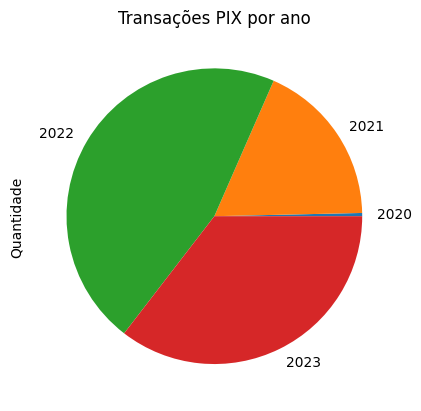

In [ ]:
df.groupby(df['Ano'])['Quantidade'].sum().plot.pie(title="Transações PIX por ano")

In [ ]:
tr2023 = df.loc[df['Ano'] == 2023]

In [ ]:
tr2023

,Data,Quantidade,Total,Media,Ano,Mes
9,2023-03-02,86677983,41061577.42,473.73,2023,3
26,2023-04-26,83724873,39003173.03,465.85,2023,4
27,2023-02-25,70959689,12298866.58,173.32,2023,2
28,2023-05-19,102830504,47307681.90,460.05,2023,5
30,2023-06-22,95573741,37688166.73,394.34,2023,6
...,...,...,...,...,...,...
956,2023-03-05,56615812,8443426.39,149.14,2023,3
964,2023-07-02,66809532,9012893.48,134.90,2023,7
965,2023-06-14,90475999,40934688.10,452.44,2023,6
970,2023-01-25,72449677,33909938.23,468.05,2023,1


In [ ]:
tr2021 = df.loc[df['Ano'] == 2021]

<Axes: title={'center': 'Transações PIX 2023'}, xlabel='Mes'>

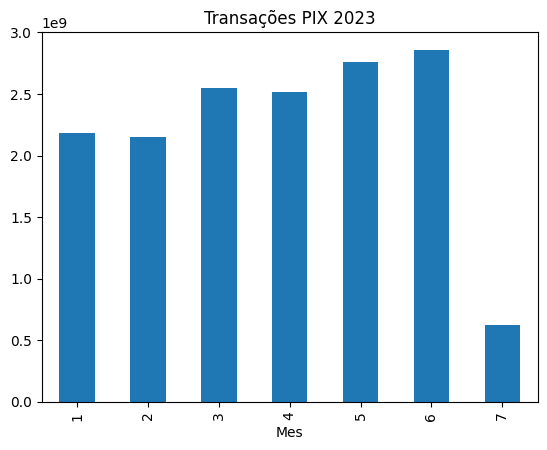

In [ ]:
tr2023.groupby(tr2023['Mes'])['Quantidade'].sum().plot.bar(title="Transações PIX 2023")

In [ ]:
tr2021.groupby(tr2021['Mes'])['Quantidade'].sum().pl.bar(title="transações PIX 2021")

AttributeError: ignored

In [ ]:
px.bar(tr2023, 'Data', 'Quantidade', title='Transações PIX 2023')

In [ ]:
tr2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 2 to 852
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        365 non-null    datetime64[ns]
 1   Quantidade  365 non-null    int64         
 2   Total       365 non-null    float64       
 3   Media       365 non-null    float64       
 4   Ano         365 non-null    int64         
 5   Mes         365 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 20.0 KB


In [ ]:
tr2023 = df.loc[df['Ano'] == 2023]

In [ ]:
tr2023.groupby(['Mes'])['Quantidade'].sum()

Mes
1    2182916966
2    2153790143
3    2546013172
4    2519076701
5    2758906073
6    2858428807
7     623633351
Name: Quantidade, dtype: int64

<AxesSubplot:title={'center':'Transações PIX 2023'}, xlabel='Mes'>

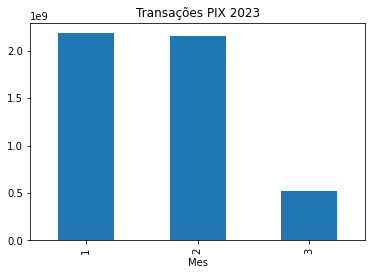

In [ ]:
tr2023.groupby(tr2023['Mes'])['Quantidade'].sum().plot.bar(title="Transações PIX 2023")

In [ ]:
df.count()

Data          100
Quantidade    100
Total         100
Media         100
Ano           100
Mes           100
dtype: int64